## Read and Plot Data ##
a new jupyter notebook so we need to read in the data from our data file <br>
we will read it into the arrays step and energy <br>
and then we will plot steps against energy <br>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
print('import complete')

import complete


read the code, there are a few new things
then run the code!

In [27]:
#open the data file
c=open('data_file','r')
#set variables and arrays
i=0
energy=[]
step=[]
tmp=[]
#read file and extract data
line=c.readline()
while line:
  line=c.readline()
  # print one line to double check it is what we think  
  if i == 0 : print(line)
  #a blank line was left in the file which gave a code error, 
  #so here we check the line is not blank
  #"strip" strips out any blank spaces
  if line.strip():
  #we have used a comma as a separtor, we add the separator explicitly to the split    
    tmp=line.split(',')
    step.append(int(tmp[0]))
    energy.append(float(tmp[1]))
    print('{0:1}{1:<3}{2:<.8f}'.format('step: ',step[i],energy[i]))
    i=i+1
  #endif
#endwhile
#close file and record total count
c.close()
total_steps=i
print('total steps ',total_steps)

   0, -765.67195475 

step: 0  -765.67195475
step: 1  -765.67357064
step: 2  -765.67184046
step: 3  -765.67404715
step: 4  -765.67357441
step: 5  -765.67474697
step: 6  -765.67550178
step: 7  -765.67573371
step: 8  -765.67671418
step: 9  -765.67689116
step: 10 -765.67694306
step: 11 -765.67696749
step: 12 -765.67698311
step: 13 -765.67699210
step: 14 -765.67699589
step: 15 -765.67699939
step: 16 -765.67699992
step: 17 -765.67700074
step: 18 -765.67700124
step: 19 -765.67700135
total steps  20


we will also plot the data <br>
we use the package matplotlib <br>
https://matplotlib.org/stable/users/explain/quick_start.html <br>
each "frame" the holds a plot is called a figure 'fig' <br>
each plot within a frame is called a subplot (we could have 2, 3, 4 etc plots in one figure)<br>
each plot will have its own name, our single plot is called 'grph' <br>
we also need to tell the code the axes lables, plot title, and which data to plot <br>
we then show the plot using plt.show()  <br>

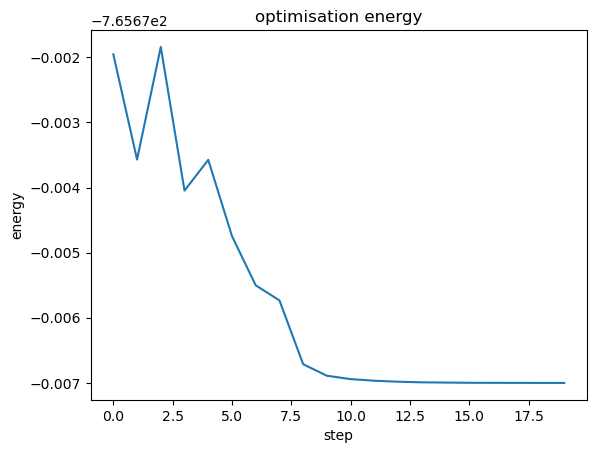

In [29]:
#create a figure (fig) with one graph (subplot) in it
#our graph is called "grph"
#matplotlib is great for generating a quick graph
fig,grph=plt.subplots()
grph.set_xlabel('step')   #label x-axis
grph.set_ylabel('energy') #label y-axis
grph.set_title('optimisation energy') #plot title
#now plot the data of step vs energy
grph.plot(step,energy)
plt.show()

matpltlib has the flexibility if you want to do some formatting<br>
you can find more formatting options here
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html <br>


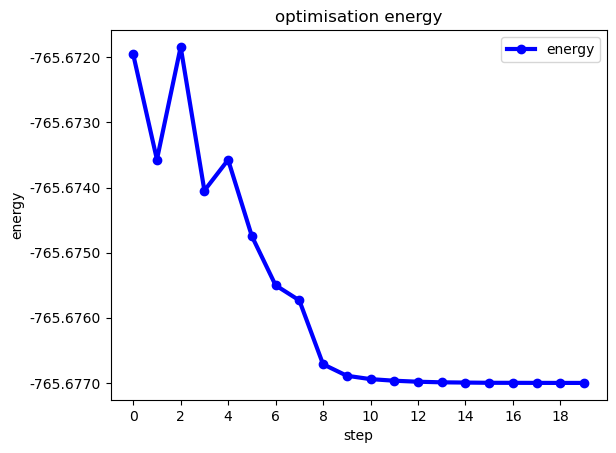

In [31]:
#we use the ticker module to format the yaxis numbers better
import matplotlib.ticker as ticker
fig,ax=plt.subplots()
ax.set_xlabel('step')   #label x-axis
ax.set_ylabel('energy') #label y-axis
ax.set_title('optimisation energy') #plot title
#now make things a bit fancy!
ax.plot(step,energy, 'o', color='blue', linewidth=3, linestyle='-', label='energy')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%9.4f'))
plt.xticks(np.arange(min(step), max(step)+1, 2.0))
ax.legend()
plt.show()